<a href="https://colab.research.google.com/github/DIPANJAN001/TalkJulia_with_Randy/blob/main/compare11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install Boruta
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from boruta import BorutaPy
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import concatenate
from keras import Model
from keras.layers import Input
from keras.layers import Bidirectional
from keras import layers
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_classification
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.layers import LeakyReLU
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.models import load_model
from keras.layers import Input
from sklearn.decomposition import PCA 
from sklearn.metrics import mean_absolute_error

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [60]:
df=pd.read_excel("/content/pv_09.xlsx")
weather_input1=df.drop('power_normed',axis=1)
weather_input=weather_input1.drop('time_idx',axis=1)
solpow=df['power_normed']

In [61]:
def lstm_data_transform(x_data, y_data, num_steps):
    """ Changes data to the format for LSTM training 
for sliding window approach """
    # Prepare the list for the transformed data
    X, y = list(), list()
    # Loop of the entire data set
    for i in range(x_data.shape[0]):
        # compute a new (sliding window) index
        end_ix = i + num_steps
        # if index is larger than the size of the dataset, we stop
        if end_ix >= x_data.shape[0]:
            break
        # Get a sequence of data for x
        seq_X = x_data[i:end_ix]
        # Get only the last element of the sequency for y
        seq_y = y_data[end_ix]
        # Append the list with sequencies
        X.append(seq_X)
        y.append(seq_y)
    # Make final arrays
    x_array = np.array(X)
    y_array = np.array(y)
    return x_array, y_array

In [62]:
from sklearn.datasets import make_classification
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.layers import LeakyReLU
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.models import load_model
from keras.layers import Input

In [63]:
n_inputs=weather_input.shape[1]

In [64]:
input_data_shape= Input(shape=(n_inputs,))
# encoder level 1
encoder= Dense(n_inputs*2)(input_data_shape)
encoder = BatchNormalization()(encoder)
encoder= LeakyReLU()(encoder)
# encoder level 2
encoder= Dense(n_inputs)(encoder)
encoder= BatchNormalization()(encoder)
encoder= LeakyReLU()(encoder)
# bottleneck
#n_bottleneck = round(float(n_inputs) / 2.0)
n_bottleneck = 20
bottleneck = Dense(n_bottleneck)(encoder)
# define decoder, level 1
decoder = Dense(n_inputs)(bottleneck)
decoder = BatchNormalization()(decoder)
decoder = LeakyReLU()(decoder)
# decoder level 2
decoder = Dense(n_inputs*2)(decoder)
decoder = BatchNormalization()(decoder)
decoder = LeakyReLU()(decoder)

In [65]:
output = Dense(n_inputs, activation='linear')(decoder)
# define autoencoder model
model = Model(inputs=input_data_shape, outputs=output)
# compile autoencoder model
model.compile(optimizer='adam', loss='mse')

In [66]:
 model.fit(weather_input,weather_input, epochs=100, batch_size=32, verbose=2)

Epoch 1/100
192/192 - 2s - loss: 0.0907 - 2s/epoch - 12ms/step
Epoch 2/100
192/192 - 1s - loss: 0.0191 - 701ms/epoch - 4ms/step
Epoch 3/100
192/192 - 1s - loss: 0.0156 - 650ms/epoch - 3ms/step
Epoch 4/100
192/192 - 1s - loss: 0.0141 - 849ms/epoch - 4ms/step
Epoch 5/100
192/192 - 1s - loss: 0.0125 - 683ms/epoch - 4ms/step
Epoch 6/100
192/192 - 1s - loss: 0.0114 - 690ms/epoch - 4ms/step
Epoch 7/100
192/192 - 1s - loss: 0.0107 - 621ms/epoch - 3ms/step
Epoch 8/100
192/192 - 1s - loss: 0.0104 - 651ms/epoch - 3ms/step
Epoch 9/100
192/192 - 1s - loss: 0.0100 - 671ms/epoch - 3ms/step
Epoch 10/100
192/192 - 1s - loss: 0.0093 - 611ms/epoch - 3ms/step
Epoch 11/100
192/192 - 1s - loss: 0.0087 - 657ms/epoch - 3ms/step
Epoch 12/100
192/192 - 1s - loss: 0.0086 - 642ms/epoch - 3ms/step
Epoch 13/100
192/192 - 1s - loss: 0.0084 - 687ms/epoch - 4ms/step
Epoch 14/100
192/192 - 1s - loss: 0.0081 - 714ms/epoch - 4ms/step
Epoch 15/100
192/192 - 1s - loss: 0.0079 - 646ms/epoch - 3ms/step
Epoch 16/100
192/192 

In [67]:
# define an encoder model (without the decoder)
encoder = Model(inputs=input_data_shape, outputs=bottleneck)
# save the encoder to file
encoder.save('encoder.h5')

In [68]:
#solpow=solpow.to_numpy().reshape(-1,1)
encoder = load_model('encoder.h5')

# encode the train data
X_train_encode = encoder.predict(weather_input)

192/192 [==============================] - 0s 2ms/step


In [69]:
encoder = load_model('encoder.h5')

# encode the train data
X_train_encode = encoder.predict(weather_input)

192/192 [==============================] - 0s 2ms/step


In [70]:
num_steps = 2
# training set
(x_transformed1,
 y_transformed1) = lstm_data_transform(X_train_encode,solpow , num_steps=num_steps)
assert x_transformed1.shape[0] == y_transformed1.shape[0]

In [71]:
X_train, X_test, y_train, y_test = train_test_split(x_transformed1, y_transformed1, test_size=0.4, random_state=42,shuffle=False)

In [72]:
inputs1=Input(shape=(X_train.shape[1],X_train.shape[2]))

In [73]:
from keras import optimizers
opt=optimizers.Adam(learning_rate=0.001)

Epoch 1/100
46/46 [==============================] - 15s 75ms/step - loss: 0.0310 - mse: 0.0310 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 2/100
46/46 [==============================] - 2s 40ms/step - loss: 0.0131 - mse: 0.0131 - val_loss: 0.0066 - val_mse: 0.0066
Epoch 3/100
46/46 [==============================] - 2s 39ms/step - loss: 0.0094 - mse: 0.0094 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 4/100
46/46 [==============================] - 2s 40ms/step - loss: 0.0078 - mse: 0.0078 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 5/100
46/46 [==============================] - 2s 41ms/step - loss: 0.0071 - mse: 0.0071 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 6/100
46/46 [==============================] - 2s 40ms/step - loss: 0.0067 - mse: 0.0067 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 7/100
46/46 [==============================] - 2s 47ms/step - loss: 0.0066 - mse: 0.0066 - val_loss: 0.0018 - val_mse: 0.0018
Epoch 8/100
46/46 [==============================] - 4s 85ms/step - loss: 0

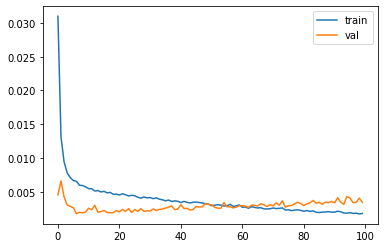

77/77 [==============================] - 2s 8ms/step


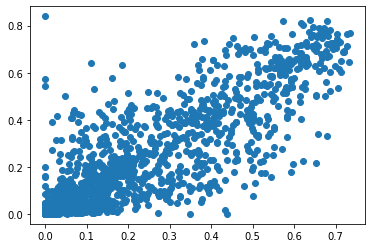

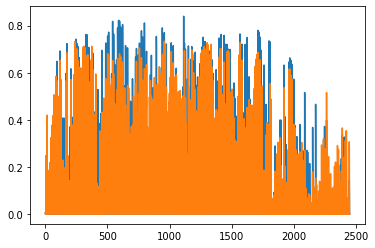

0.09228672661235708
0.04606981674583327


In [74]:
def define_model():


  # firs
  fe1_0 = LSTM(208, activation='relu',return_sequences = True)(inputs1)
  fe1_1 = Dropout(0.5)(fe1_0)
  fe1_2 = LSTM(24, activation='relu',return_sequences = True)(fe1_1)
  fe1_3= Dropout(0.5)(fe1_2)
  fe1_4=LSTM(30, activation='relu')(fe1_3)
  out1_1=Dense(1, activation='relu')(fe1_4)



  fe2_0 = LSTM(208, activation='relu',return_sequences = True)(inputs1)
  fe2_1 = Dropout(0.5)(fe2_0)
  fe2_2 = LSTM(60, activation='relu',return_sequences = True)(fe2_1)
  fe2_3= Dropout(0.5)(fe2_2)
  fe2_4=LSTM(4, activation='relu')(fe2_3)
  out2_1=Dense(1, activation='relu')(fe2_4)

  fe3_0 =LSTM(104, activation='relu',return_sequences = True)(inputs1)
  fe3_1 = Dropout(0.6)(fe3_0)
  fe3_2 = LSTM(96, activation='relu',return_sequences = True)(fe3_1)
  fe3_3= Dropout(0.5)(fe3_2)
  fe3_4=LSTM(8, activation='relu')(fe3_3)#16
  out3_1=Dense(1, activation='relu')(fe3_4)
 
 

  output = layers.average([ out1_1, out2_1, out3_1])
  #merged3 = concatenate([out1_1,out2_1,out3_1], name='concat3')
  #output = Dense(1, activation='relu')( merged3)
  

  model = Model(inputs=[inputs1], outputs=[output])
  model.compile(optimizer=opt,loss='mean_squared_error',metrics=['mse'])
 
  return model
mdl=define_model()
history=mdl.fit(X_train, y_train, epochs = 100,validation_split=0.2,batch_size =64 )
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()
y=mdl.predict(X_test)
plt.scatter(y,y_test)
plt.show()
df = pd.DataFrame()
df['time']=[i for i in range(len(y))]
df['Actual']=y_test
df['Predicted']=y
plt.plot(df['time'],df['Actual'])
plt.plot(df['time'],df['Predicted'])
plt.show()
print(np.sqrt(mean_squared_error(y,y_test)))
print(mean_absolute_error(y, y_test))

Epoch 1/200
46/46 [==============================] - 28s 191ms/step - loss: 0.0187 - mse: 0.0187 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 2/200
46/46 [==============================] - 2s 41ms/step - loss: 0.0101 - mse: 0.0101 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 3/200
46/46 [==============================] - 3s 58ms/step - loss: 0.0076 - mse: 0.0076 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 4/200
46/46 [==============================] - 3s 74ms/step - loss: 0.0067 - mse: 0.0067 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 5/200
46/46 [==============================] - 2s 41ms/step - loss: 0.0062 - mse: 0.0062 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 6/200
46/46 [==============================] - 2s 40ms/step - loss: 0.0061 - mse: 0.0061 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 7/200
46/46 [==============================] - 2s 41ms/step - loss: 0.0058 - mse: 0.0058 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 8/200
46/46 [==============================] - 2s 40ms/step - loss: 

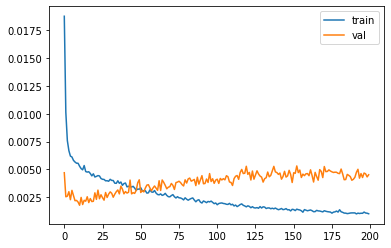

77/77 [==============================] - 2s 8ms/step


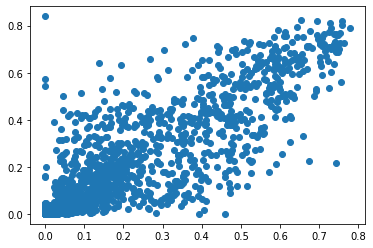

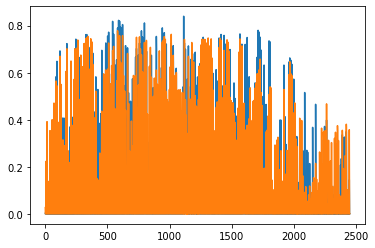

0.09571750155026677
0.04829892936241929


In [88]:
def define_model():


  # firs
  fe1_0 = LSTM(208, activation='relu',return_sequences = True)(inputs1)
  fe1_1 = Dropout(0.5)(fe1_0)
  fe1_2 = LSTM(24, activation='relu',return_sequences = True)(fe1_1)
  fe1_3= Dropout(0.2)(fe1_2)
  fe1_4=LSTM(30, activation='relu')(fe1_3)
  out1_1=Dense(1, activation='relu')(fe1_4)



  fe2_0 = LSTM(208, activation='relu',return_sequences = True)(inputs1)
  fe2_1 = Dropout(0.6)(fe2_0)
  fe2_2 = LSTM(60, activation='relu',return_sequences = True)(fe2_1)
  fe2_3= Dropout(0.5)(fe2_2)
  fe2_4=LSTM(4, activation='relu')(fe2_3)
  out2_1=Dense(1, activation='relu')(fe2_4)

  fe3_0 =LSTM(104, activation='relu',return_sequences = True)(inputs1)
  fe3_1 = Dropout(0.6)(fe3_0)
  fe3_2 = LSTM(96, activation='relu',return_sequences = True)(fe3_1)
  fe3_3= Dropout(0.5)(fe3_2)
  fe3_4=LSTM(8, activation='relu')(fe3_3)#16
  out3_1=Dense(1, activation='relu')(fe3_4)
 
 

  output = layers.average([ out1_1, out2_1, out3_1])
  #merged3 = concatenate([out1_1,out2_1,out3_1], name='concat3')
  #output = Dense(1, activation='relu')( merged3)
  

  model = Model(inputs=[inputs1], outputs=[output])
  model.compile(optimizer=opt,loss='mean_squared_error',metrics=['mse'])
 
  return model
mdl=define_model()
history=mdl.fit(X_train, y_train, epochs = 200,validation_split=0.2,batch_size =64)
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()
y=mdl.predict(X_test)
plt.scatter(y,y_test)
plt.show()
df = pd.DataFrame()
df['time']=[i for i in range(len(y))]
df['Actual']=y_test
df['Predicted']=y
plt.plot(df['time'],df['Actual'])
plt.plot(df['time'],df['Predicted'])
plt.show()
print(np.sqrt(mean_squared_error(y,y_test)))
print(mean_absolute_error(y, y_test))

In [89]:
from keras.layers import Bidirectional


Epoch 1/100
46/46 [==============================] - 32s 166ms/step - loss: 0.0130 - mse: 0.0130 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 2/100
46/46 [==============================] - 4s 89ms/step - loss: 0.0070 - mse: 0.0070 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 3/100
46/46 [==============================] - 4s 87ms/step - loss: 0.0060 - mse: 0.0060 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 4/100
46/46 [==============================] - 4s 92ms/step - loss: 0.0056 - mse: 0.0056 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 5/100
46/46 [==============================] - 4s 90ms/step - loss: 0.0052 - mse: 0.0052 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 6/100
46/46 [==============================] - 4s 91ms/step - loss: 0.0050 - mse: 0.0050 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 7/100
46/46 [==============================] - 4s 90ms/step - loss: 0.0049 - mse: 0.0049 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 8/100
46/46 [==============================] - 4s 88ms/step - loss: 

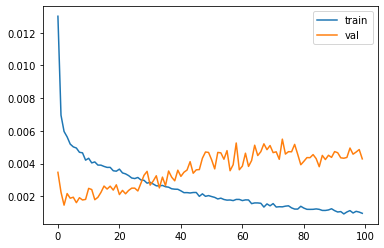

77/77 [==============================] - 7s 16ms/step


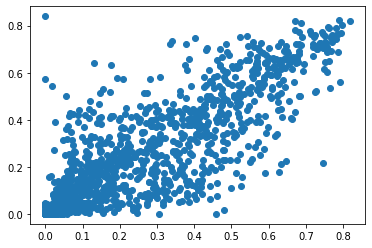

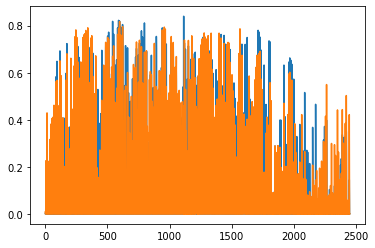

0.09373706460496059
0.045924792477667245


In [90]:
def define_model():


  # firs
  fe1_0 = Bidirectional(LSTM(208, activation='relu',return_sequences = True))(inputs1)
  fe1_1 = Dropout(0.5)(fe1_0)
  fe1_2 = Bidirectional(LSTM(24, activation='relu',return_sequences = True))(fe1_1)
  fe1_3= Dropout(0.2)(fe1_2)
  fe1_4=Bidirectional(LSTM(30, activation='relu'))(fe1_3)
  out1_1=Dense(1, activation='relu')(fe1_4)



  fe2_0 = Bidirectional(LSTM(208, activation='relu',return_sequences = True))(inputs1)
  fe2_1 = Dropout(0.6)(fe2_0)
  fe2_2 = Bidirectional(LSTM(60, activation='relu',return_sequences = True))(fe2_1)
  fe2_3= Dropout(0.5)(fe2_2)
  fe2_4=Bidirectional(LSTM(4, activation='relu'))(fe2_3)
  out2_1=Dense(1, activation='relu')(fe2_4)

  fe3_0 =Bidirectional(LSTM(104, activation='relu',return_sequences = True))(inputs1)
  fe3_1 = Dropout(0.6)(fe3_0)
  fe3_2 = Bidirectional(LSTM(96, activation='relu',return_sequences = True))(fe3_1)
  fe3_3= Dropout(0.5)(fe3_2)
  fe3_4=Bidirectional(LSTM(8, activation='relu'))(fe3_3)#16
  out3_1=Dense(1, activation='relu')(fe3_4)
 
 

  output = layers.average([ out1_1, out2_1, out3_1])
  #merged3 = concatenate([out1_1,out2_1,out3_1], name='concat3')
  #output = Dense(1, activation='relu')( merged3)
  

  model = Model(inputs=[inputs1], outputs=[output])
  model.compile(optimizer=opt,loss='mean_squared_error',metrics=['mse'])
 
  return model
mdl=define_model()
history=mdl.fit(X_train, y_train, epochs =100,validation_split=0.2,batch_size =64)
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()
y=mdl.predict(X_test)
plt.scatter(y,y_test)
plt.show()
df = pd.DataFrame()
df['time']=[i for i in range(len(y))]
df['Actual']=y_test
df['Predicted']=y
plt.plot(df['time'],df['Actual'])
plt.plot(df['time'],df['Predicted'])
plt.show()
print(np.sqrt(mean_squared_error(y,y_test)))
print(mean_absolute_error(y, y_test))

Epoch 1/100
46/46 [==============================] - 32s 163ms/step - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 2/100
46/46 [==============================] - 4s 94ms/step - loss: 0.0084 - mse: 0.0084 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 3/100
46/46 [==============================] - 4s 95ms/step - loss: 0.0069 - mse: 0.0069 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 4/100
46/46 [==============================] - 4s 89ms/step - loss: 0.0062 - mse: 0.0062 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 5/100
46/46 [==============================] - 4s 91ms/step - loss: 0.0059 - mse: 0.0059 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 6/100
46/46 [==============================] - 4s 92ms/step - loss: 0.0054 - mse: 0.0054 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 7/100
46/46 [==============================] - 4s 90ms/step - loss: 0.0053 - mse: 0.0053 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 8/100
46/46 [==============================] - 4s 92ms/step - loss: 

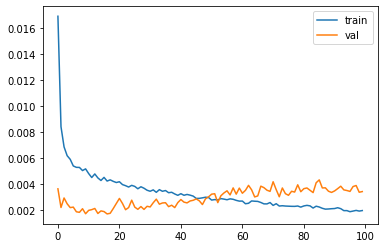

77/77 [==============================] - 6s 15ms/step


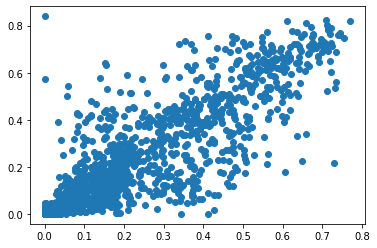

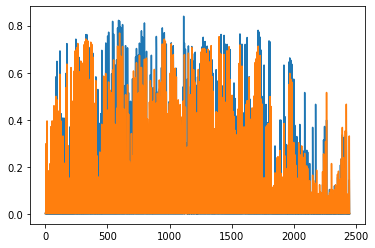

0.0895852618744593
0.045090351281051426


In [91]:
def define_model():


  # firs
  fe1_0 = Bidirectional(LSTM(208, activation='relu',return_sequences = True))(inputs1)
  fe1_1 = Dropout(0.5)(fe1_0)
  fe1_2 = Bidirectional(LSTM(24, activation='relu',return_sequences = True))(fe1_1)
  fe1_3= Dropout(0.2)(fe1_2)
  fe1_4=Bidirectional(LSTM(30, activation='relu'))(fe1_3)
  out1_1=Dense(1, activation='relu')(fe1_4)



  fe2_0 = Bidirectional(LSTM(208, activation='relu',return_sequences = True))(inputs1)
  fe2_1 = Dropout(0.6)(fe2_0)
  fe2_2 = Bidirectional(LSTM(60, activation='relu',return_sequences = True))(fe2_1)
  fe2_3= Dropout(0.5)(fe2_2)
  fe2_4=Bidirectional(LSTM(4, activation='relu'))(fe2_3)
  out2_1=Dense(1, activation='relu')(fe2_4)

  fe3_0 =Bidirectional(LSTM(104, activation='relu',return_sequences = True))(inputs1)
  fe3_1 = Dropout(0.6)(fe3_0)
  fe3_2 = Bidirectional(LSTM(96, activation='relu',return_sequences = True))(fe3_1)
  fe3_3= Dropout(0.5)(fe3_2)
  fe3_4=Bidirectional(LSTM(8, activation='relu'))(fe3_3)#16
  out3_1=Dense(1, activation='relu')(fe3_4)
 
 

  #output = layers.average([ out1_1, out2_1, out3_1])
  merged3 = concatenate([out1_1,out2_1,out3_1], name='concat3')
  output = Dense(1, activation='relu')( merged3)
  

  model = Model(inputs=[inputs1], outputs=[output])
  model.compile(optimizer=opt,loss='mean_squared_error',metrics=['mse'])
 
  return model
mdl=define_model()
history=mdl.fit(X_train, y_train, epochs =100,validation_split=0.2,batch_size =64)
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()
y=mdl.predict(X_test)
plt.scatter(y,y_test)
plt.show()
df = pd.DataFrame()
df['time']=[i for i in range(len(y))]
df['Actual']=y_test
df['Predicted']=y
plt.plot(df['time'],df['Actual'])
plt.plot(df['time'],df['Predicted'])
plt.show()
print(np.sqrt(mean_squared_error(y,y_test)))
print(mean_absolute_error(y, y_test))

In [92]:
from keras.models import Sequential
from keras.layers import Dense,SimpleRNN
from keras.layers import LSTM
from keras.layers import Dropout

In [93]:
SimRNN=Sequential()
SimRNN.add(SimpleRNN(20,return_sequences=True,input_shape=(2,20)))
SimRNN.add(SimpleRNN(20,return_sequences=True))
SimRNN.add(SimpleRNN(1))

In [94]:
SimRNN.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
SimRNN.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_9 (SimpleRNN)    (None, 2, 20)             820       
                                                                 
 simple_rnn_10 (SimpleRNN)   (None, 2, 20)             820       
                                                                 
 simple_rnn_11 (SimpleRNN)   (None, 1)                 22        
                                                                 
Total params: 1,662
Trainable params: 1,662
Non-trainable params: 0
_________________________________________________________________


In [95]:
SimRNN.fit(X_train,y_train, epochs=200, batch_size=64, validation_split = 0.2)

Epoch 1/200
46/46 [==============================] - 3s 16ms/step - loss: 0.2915 - mean_absolute_error: 0.2915 - val_loss: 0.2097 - val_mean_absolute_error: 0.2097
Epoch 2/200
46/46 [==============================] - 0s 5ms/step - loss: 0.1478 - mean_absolute_error: 0.1478 - val_loss: 0.1166 - val_mean_absolute_error: 0.1166
Epoch 3/200
46/46 [==============================] - 0s 5ms/step - loss: 0.1138 - mean_absolute_error: 0.1138 - val_loss: 0.0981 - val_mean_absolute_error: 0.0981
Epoch 4/200
46/46 [==============================] - 0s 6ms/step - loss: 0.0946 - mean_absolute_error: 0.0946 - val_loss: 0.0770 - val_mean_absolute_error: 0.0770
Epoch 5/200
46/46 [==============================] - 0s 6ms/step - loss: 0.0841 - mean_absolute_error: 0.0841 - val_loss: 0.0746 - val_mean_absolute_error: 0.0746
Epoch 6/200
46/46 [==============================] - 0s 5ms/step - loss: 0.0761 - mean_absolute_error: 0.0761 - val_loss: 0.0655 - val_mean_absolute_error: 0.0655
Epoch 7/200
46/46 [==

In [96]:
y=SimRNN.predict(X_test)

77/77 [==============================] - 1s 2ms/step


In [97]:
print(np.sqrt(mean_squared_error(y,y_test)))
print(mean_absolute_error(y, y_test))

0.09150528923933908
0.05131317351858167


In [98]:
regressor1 = Sequential()
regressor1.add(LSTM(units = 50, return_sequences = True, input_shape = (2,20)))
regressor1.add(Dropout(0.2))

regressor1.add(LSTM(units = 50, return_sequences = True))
regressor1.add(Dropout(0.25))

regressor1.add(LSTM(units = 50, return_sequences = True))
regressor1.add(Dropout(0.25))

regressor1.add(LSTM(units = 50))
regressor1.add(Dropout(0.25))

regressor1.add(Dense(units = 1))

regressor1.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor1.fit(X_train, y_train, epochs = 200, batch_size = 64)

Epoch 1/200
58/58 [==============================] - 9s 12ms/step - loss: 0.0247
Epoch 2/200
58/58 [==============================] - 1s 12ms/step - loss: 0.0102
Epoch 3/200
58/58 [==============================] - 1s 12ms/step - loss: 0.0080
Epoch 4/200
58/58 [==============================] - 1s 12ms/step - loss: 0.0073
Epoch 5/200
58/58 [==============================] - 1s 12ms/step - loss: 0.0065
Epoch 6/200
58/58 [==============================] - 1s 12ms/step - loss: 0.0063
Epoch 7/200
58/58 [==============================] - 1s 12ms/step - loss: 0.0060
Epoch 8/200
58/58 [==============================] - 1s 12ms/step - loss: 0.0057
Epoch 9/200
58/58 [==============================] - 1s 12ms/step - loss: 0.0056
Epoch 10/200
58/58 [==============================] - 1s 12ms/step - loss: 0.0054
Epoch 11/200
58/58 [==============================] - 1s 12ms/step - loss: 0.0055
Epoch 12/200
58/58 [==============================] - 1s 12ms/step - loss: 0.0052
Epoch 13/200
58/58 [=====

In [99]:
y=regressor1.predict(X_test)

77/77 [==============================] - 2s 3ms/step


In [100]:
print(np.sqrt(mean_squared_error(y,y_test)))
print(mean_absolute_error(y, y_test))

0.0951646233693547
0.04831012054763669
